In [2]:
#import nessary model

import numpy as np
import random 
import matplotlib.pyplot as plt
import pickle
import cv2
import os


In [3]:
Directory=r"C:\Users\Logithashwath\Documents\machine learning program.practice\dataset"
Category =["with mask","without mask"]

In [4]:
#all images change to array and all image shape change to same shape
img_size = 100
data = []

for categ in Category:
    folder= os.path.join(Directory,categ)
    print(folder)
    label = Category.index(categ)
    print(label)
    for img in os.listdir(folder):
           imgpath=os.path.join(folder,img)
           imgarr = cv2.imread(imgpath)
           imgarr = cv2.resize(imgarr,(img_size,img_size))
           data.append([imgarr,label])

C:\Users\Logithashwath\Documents\machine learning program.practice\dataset\with mask
0
C:\Users\Logithashwath\Documents\machine learning program.practice\dataset\without mask
1


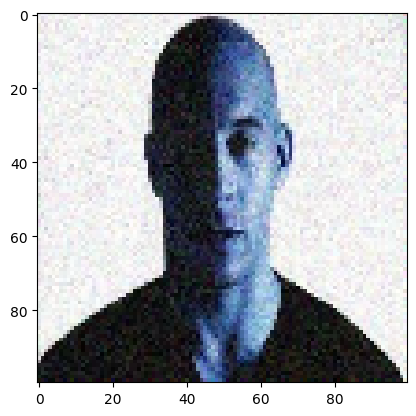

In [5]:
# after change img shape i check the img quality

plt.imshow(imgarr)

In [6]:
#check the data shpe

len(data)

1376

In [7]:
#i used shuffele function because the remote and phone label values mixed with each other, its come to stop the imbalance dataset

random.shuffle(data)

In [8]:
data[0]

[array([[[119, 117, 119],
         [130, 130, 134],
         [132, 131, 137],
         ...,
         [255, 253, 255],
         [254, 253, 255],
         [254, 253, 255]],
 
        [[ 23,  30,  33],
         [ 30,  37,  40],
         [ 36,  41,  45],
         ...,
         [254, 254, 252],
         [255, 255, 252],
         [252, 253, 251]],
 
        [[ 68,  62,  69],
         [ 75,  68,  73],
         [ 77,  67,  71],
         ...,
         [254, 253, 254],
         [253, 252, 254],
         [249, 248, 251]],
 
        ...,
 
        [[115, 130, 138],
         [120, 134, 139],
         [127, 144, 148],
         ...,
         [ 96,  96,  96],
         [ 15,   1,   1],
         [ 10,   4,   5]],
 
        [[141, 160, 168],
         [ 38,  58,  64],
         [ 75,  96,  99],
         ...,
         [118, 124, 122],
         [ 17,   5,   5],
         [ 34,  28,  29]],
 
        [[136, 164, 167],
         [126, 156, 161],
         [120, 148, 153],
         ...,
         [240, 253, 251],
  

In [9]:
# split feature and labels ,then change to array and feature dataype also changed because not supported convolutional process  int8 datatype

x=[]
u=[]
for features,labels in data:
     x.append(features)
     u.append(labels)
X=np.array(x, dtype=np.float32)
y=np.array(u)

In [10]:
y

array([1, 0, 0, ..., 1, 1, 1])

In [11]:
# feature scaling , big value change to small value ,its used to easly find the pattern
X=X/255

In [12]:
X

array([[[[0.46666667, 0.45882353, 0.46666667],
         [0.50980395, 0.50980395, 0.5254902 ],
         [0.5176471 , 0.5137255 , 0.5372549 ],
         ...,
         [1.        , 0.99215686, 1.        ],
         [0.99607843, 0.99215686, 1.        ],
         [0.99607843, 0.99215686, 1.        ]],

        [[0.09019608, 0.11764706, 0.12941177],
         [0.11764706, 0.14509805, 0.15686275],
         [0.14117648, 0.16078432, 0.1764706 ],
         ...,
         [0.99607843, 0.99607843, 0.9882353 ],
         [1.        , 1.        , 0.9882353 ],
         [0.9882353 , 0.99215686, 0.9843137 ]],

        [[0.26666668, 0.24313726, 0.27058825],
         [0.29411766, 0.26666668, 0.28627452],
         [0.3019608 , 0.2627451 , 0.2784314 ],
         ...,
         [0.99607843, 0.99215686, 0.99607843],
         [0.99215686, 0.9882353 , 0.99607843],
         [0.9764706 , 0.972549  , 0.9843137 ]],

        ...,

        [[0.4509804 , 0.50980395, 0.5411765 ],
         [0.47058824, 0.5254902 , 0.54509807]

In [13]:
X.shape

(1376, 100, 100, 3)

In [14]:
#spliting traing and test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y  ,test_size=0.1,random_state=42)

In [15]:
#build the model

from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout

model=Sequential()
model.add(Conv2D(64,(7,7),activation="relu"))
model.add(MaxPool2D((7,7)))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dense(500,input_shape=X.shape[1:],activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(250,activation="relu"))
model.add(Dropout(0.25))      
model.add(Dense(100,activation="relu"))
model.add(Dropout(0.25))         
model.add(Dense(2,activation="softmax"))
model.compile(optimizer="adam",loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [20]:
# train the model

model.fit(X_train,y_train,epochs=10, batch_size=20)

Epoch 1/10
62/62 [==============================] - 12s 189ms/step - loss: 0.0444 - accuracy: 0.9887
Epoch 2/10
62/62 [==============================] - 9s 152ms/step - loss: 0.0390 - accuracy: 0.9879
Epoch 3/10
62/62 [==============================] - 10s 162ms/step - loss: 0.0165 - accuracy: 0.9960
Epoch 4/10
62/62 [==============================] - 10s 169ms/step - loss: 0.0167 - accuracy: 0.9960
Epoch 5/10
62/62 [==============================] - 14s 219ms/step - loss: 0.0195 - accuracy: 0.9943
Epoch 6/10
62/62 [==============================] - 12s 200ms/step - loss: 0.0102 - accuracy: 0.9960
Epoch 7/10
62/62 [==============================] - 13s 214ms/step - loss: 0.0037 - accuracy: 0.9984
Epoch 8/10
62/62 [==============================] - 11s 181ms/step - loss: 0.0053 - accuracy: 0.9968
Epoch 9/10
62/62 [==============================] - 13s 206ms/step - loss: 0.0028 - accuracy: 0.9992
Epoch 10/10
62/62 [==============================] - 12s 194ms/step - loss: 0.0274 - accurac

In [21]:
#evaluate the model

model.evaluate(X_test,y_test)

5/5 [==============================] - 0s 75ms/step - loss: 0.0705 - accuracy: 0.9855


[0.07051790505647659, 0.9855072498321533]

In [18]:
X_train.shape

(1238, 100, 100, 3)

### Make Prediction

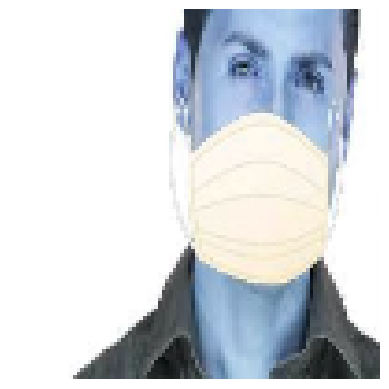

1/1 [==============================] - 0s 47ms/step
with mask
Predicted label: 0


In [32]:
# Assuming X_test is a NumPy array containing images and y_test is the corresponding labels
idx2 = random.randint(0, len(y_test) - 1)  # Generate a random index within the valid range
plt.imshow(X_test[idx2], cmap='gray', interpolation='nearest')  # Adjust colormap and interpolation
plt.axis('off')  # Turn off axis for cleaner display
plt.show()

# Assuming your model is already trained and loaded
y_pred_probs = model.predict(X_test[idx2].reshape(1, 100, 100, 3))

# Convert probabilities to a single prediction (binary classification)
if y_pred_probs[0][0] > y_pred_probs[0][1]:
    y_pred = 0  # Class 0
    print("with mask")
else:
    y_pred = 1  # Class 1
    print("without mask")

# Now you can use y_pred as needed, such as printing the predicted label
print("Predicted label:", y_pred)